<a href="https://colab.research.google.com/github/ShailendraSChauhan/DP100/blob/main/BikeRentalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bike Rental Analysis using Regression Techniques
- DataSet -https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv

In [40]:
#Import the Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
#Load the dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv("daily-bike-share.csv")
bike_data.sample(5)

--2024-01-31 13:04:04--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv.4’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.01s   

2024-01-31 13:04:04 (4.24 MB/s) - ‘daily-bike-share.csv.4’ saved [48800/48800]



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
60,61,3/2/2011,1,0,3,0,3,1,1,0.335000,0.320071,0.449583,0.307833,231
445,446,3/21/2012,2,1,3,0,3,1,2,0.531667,0.513258,0.821250,0.089558,1122
20,21,1/21/2011,1,0,1,0,5,1,1,0.177500,0.157833,0.457083,0.353242,75
294,295,10/22/2011,4,0,10,0,6,0,1,0.422500,0.425492,0.629167,0.092667,1499
12,13,1/13/2011,1,0,1,0,4,1,1,0.165000,0.150883,0.470417,0.301000,38


In [42]:
#Exctract Day Column from dteday
bike_data["Day"] = pd.DatetimeIndex(bike_data.dteday).day
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,Day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


In [43]:
bike_data[['temp','atemp','hum', 'windspeed','rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [44]:
bike_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
Day           0
dtype: int64

In [45]:
numeric_features = ['temp','atemp','hum', 'windspeed']
label = bike_data['rentals']

In [46]:
#Function for distribution
%matplotlib inline

def show_distribution(var_name):

  #Create plot for 2 subplots, 2 rows and 1 columns
  fig, ax = plt.subplots(2, 1, figsize=(10,6))

  # #Get current axes
  # ax= fig.gca()

  #Plot the histogram
  ax[0].hist(var_name, bins=100)
  ax[0].set_ylabel("Frequency")
  #Plot mean,median line
  ax[0].axvline(var_name.mean(), color="yellow", linestyle="dashed")
  ax[0].axvline(var_name.median(), color="red", linestyle="dashed")

  #Plot the box plot
  ax[1].boxplot(var_name, vert=False)
  ax[1].set_xlabel("Values")

  fig.suptitle(var_name.name)

  plt.show



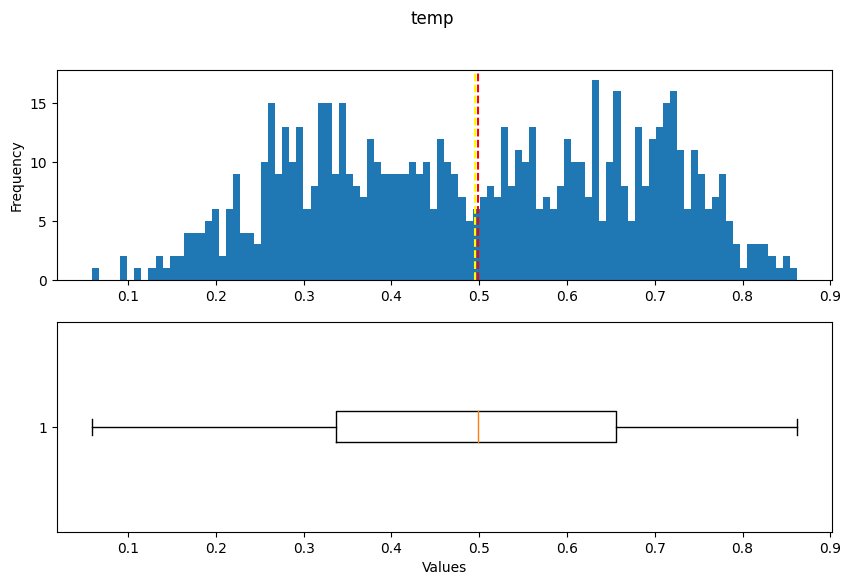

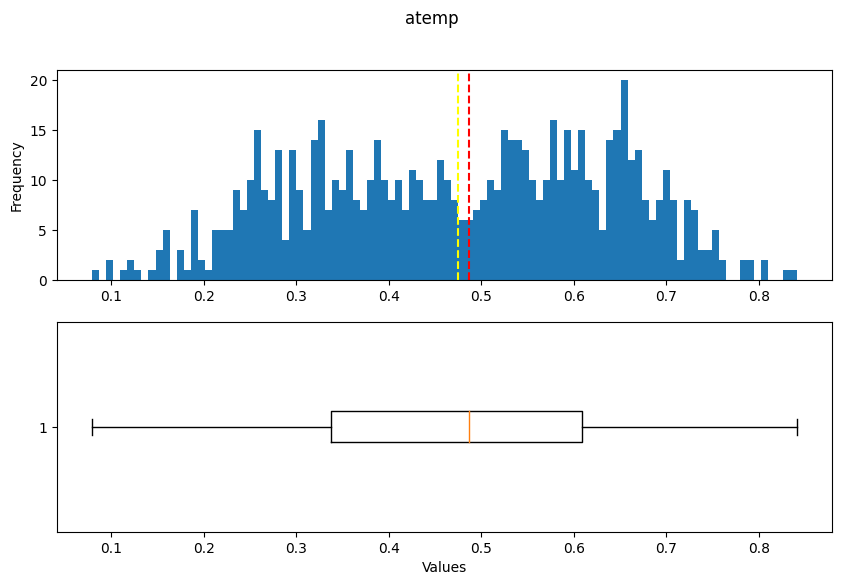

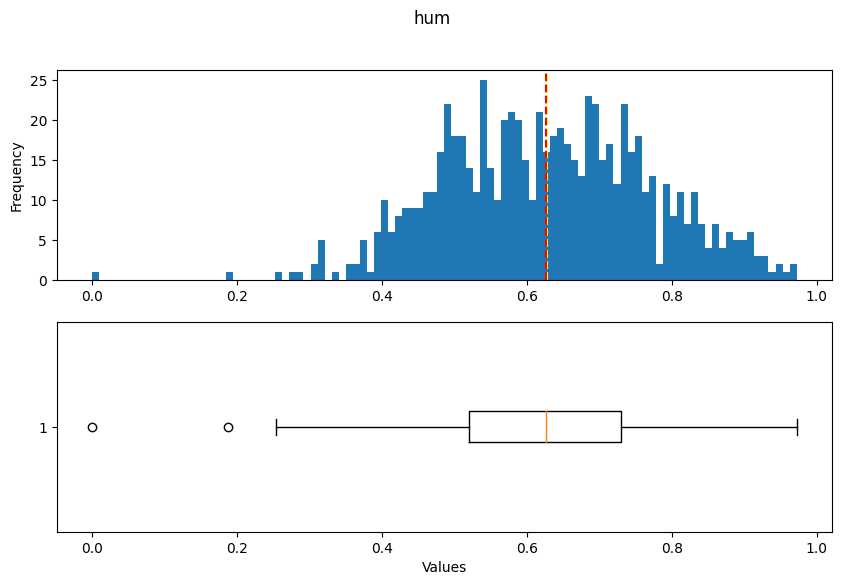

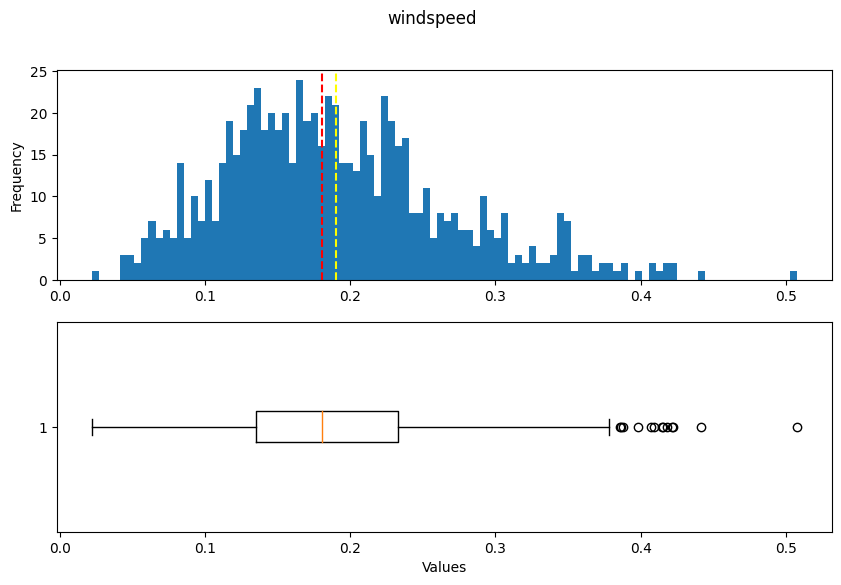

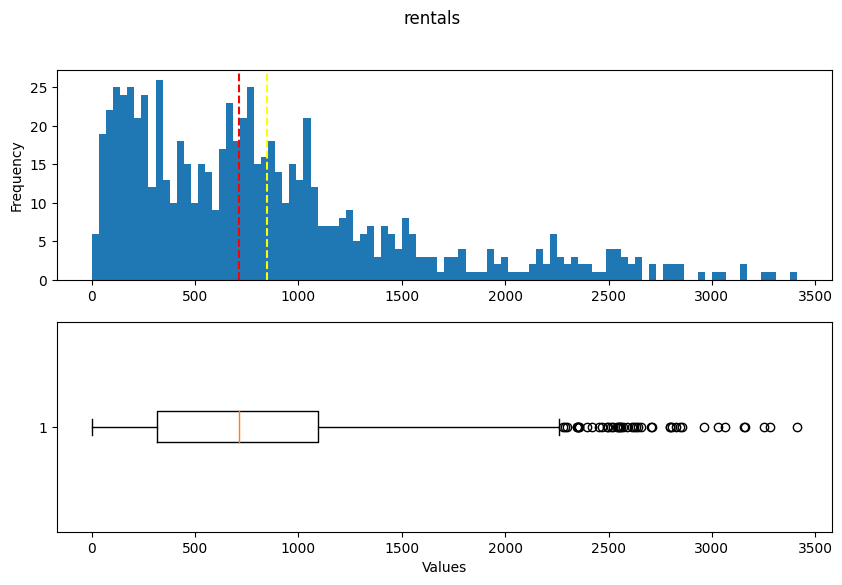

In [47]:
for col in numeric_features:
  show_distribution(bike_data[col])

show_distribution(label)

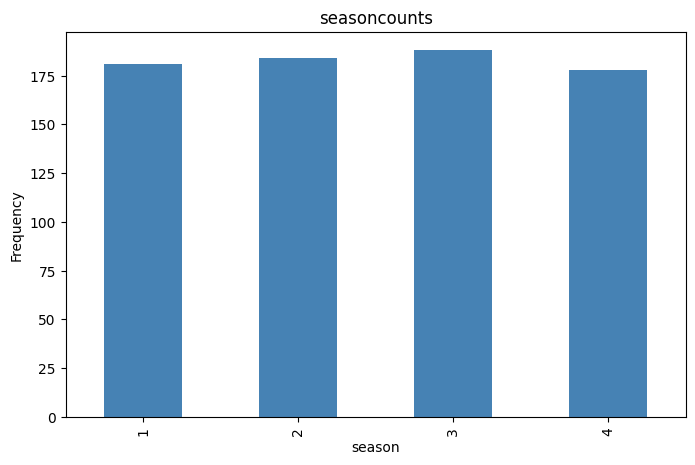

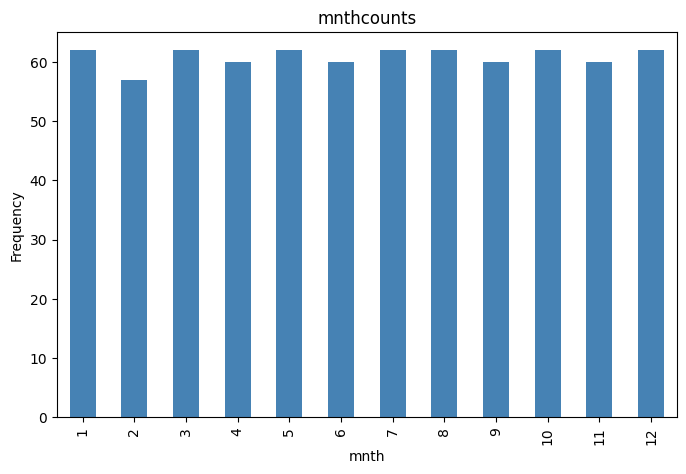

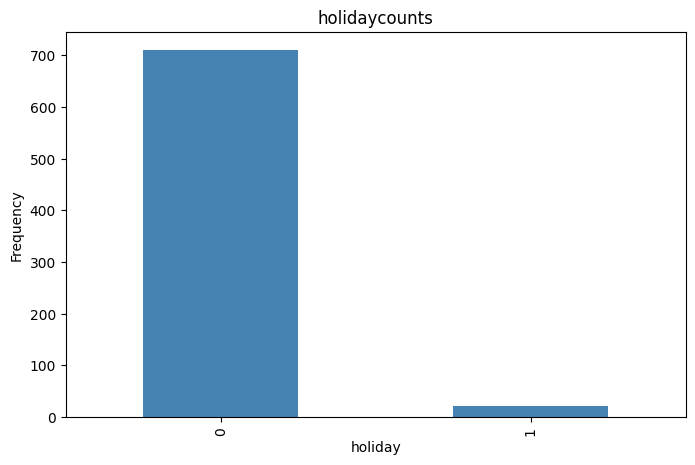

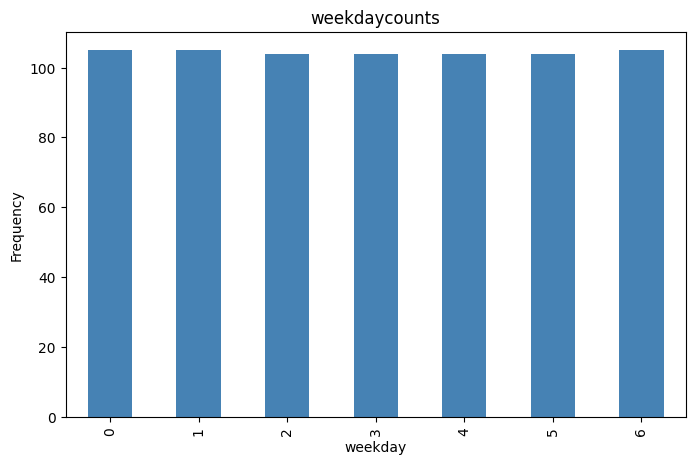

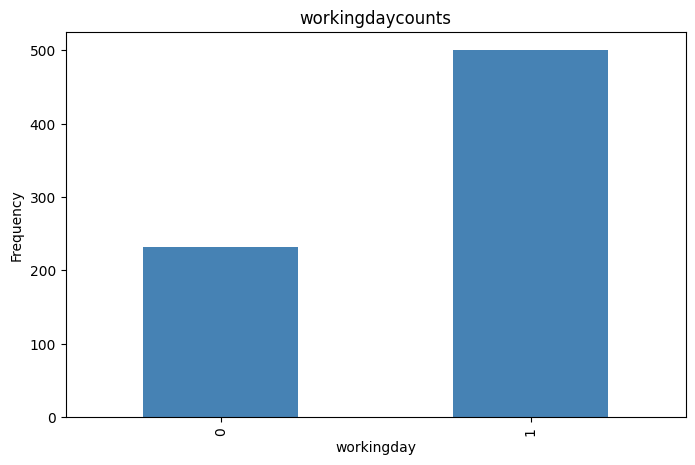

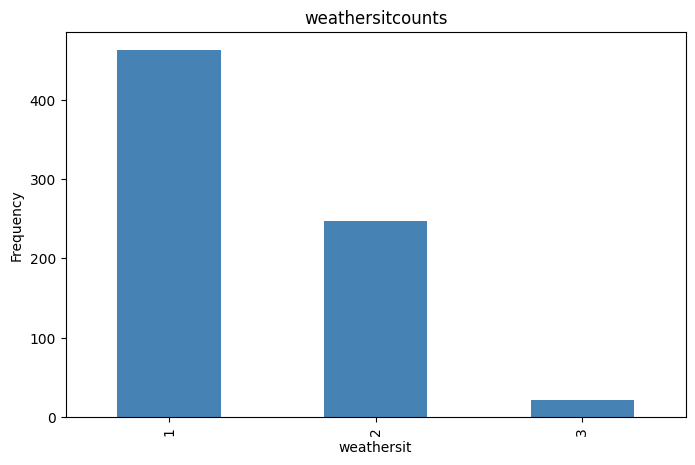

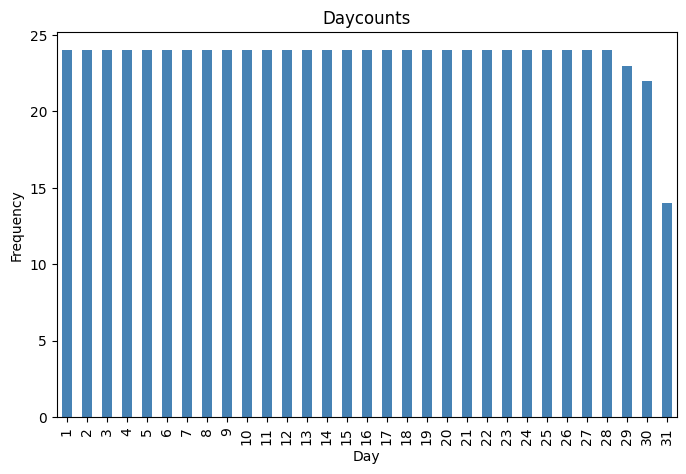

In [48]:
#Plot the Categorical features
cat_features = ['season','mnth','holiday',	'weekday'	,'workingday'	,'weathersit', 'Day']

for col in cat_features:
  counts = bike_data[col].value_counts().sort_index()
  fig = plt.figure(figsize=(8,5))
  ax= fig.gca()
  counts.plot.bar(ax=ax, color="steelblue")
  ax.set_title(col + 'counts')
  ax.set_xlabel(col)
  ax.set_ylabel("Frequency")

plt.show()

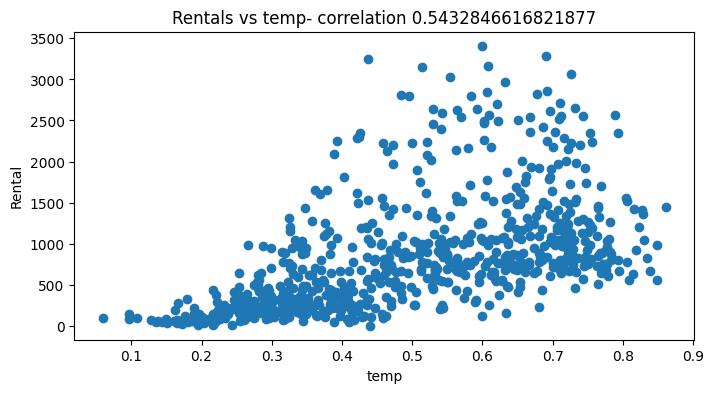

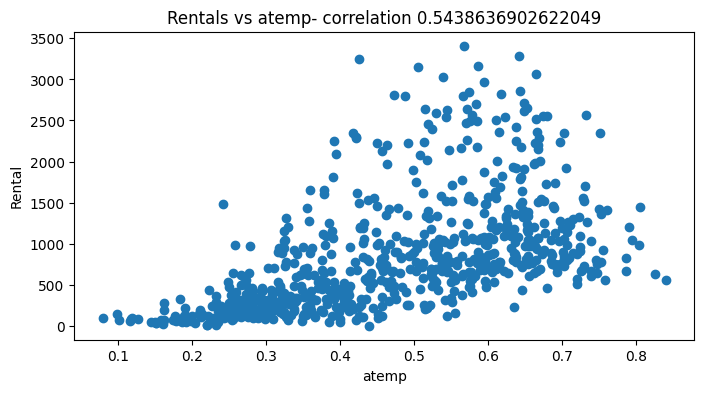

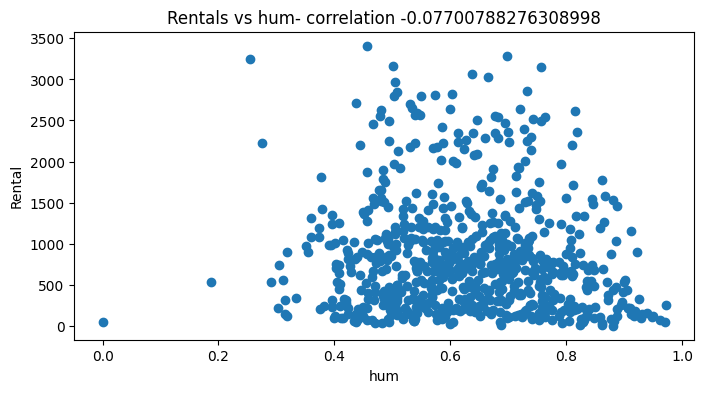

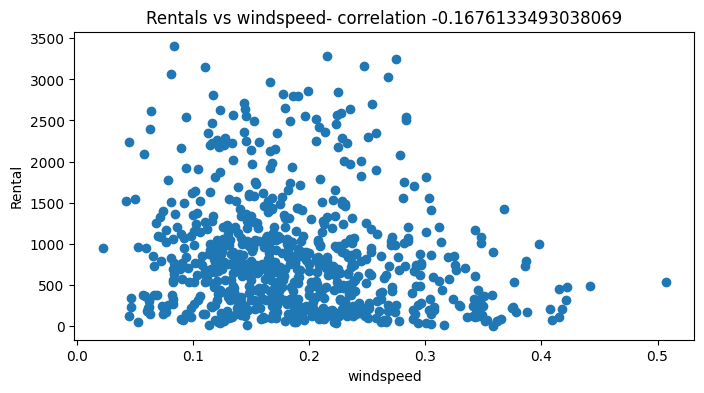

In [49]:
#Find the relationship between the numeric features and rentals
for col in numeric_features:
  fig = plt.figure(figsize=(8,4))
  ax= fig.gca()
  correlation = bike_data[col].corr(bike_data['rentals'])
  plt.scatter(x= bike_data[col], y= bike_data['rentals'])
  plt.xlabel(col)
  ax.set_ylabel("Rental")
  plt.title('Rentals vs ' +col + '- correlation ' + str(correlation))

plt.show()


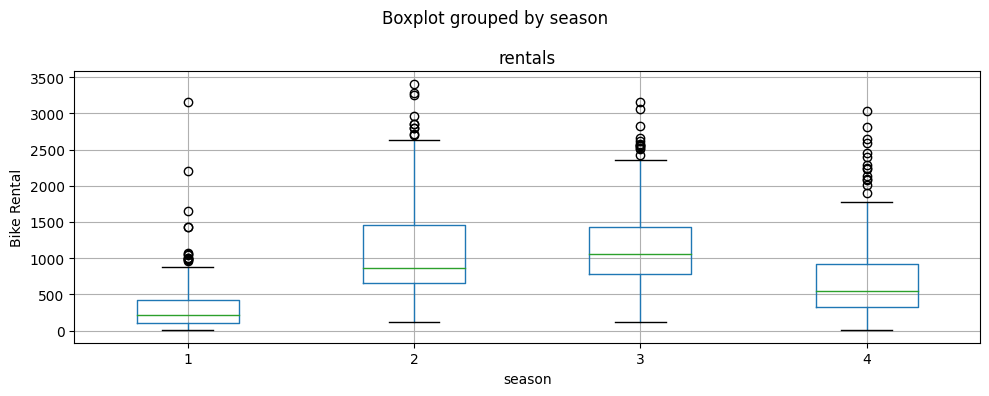

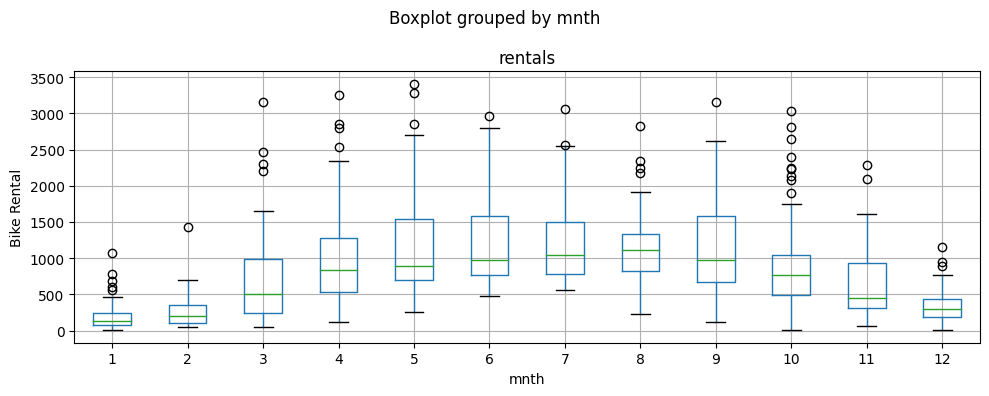

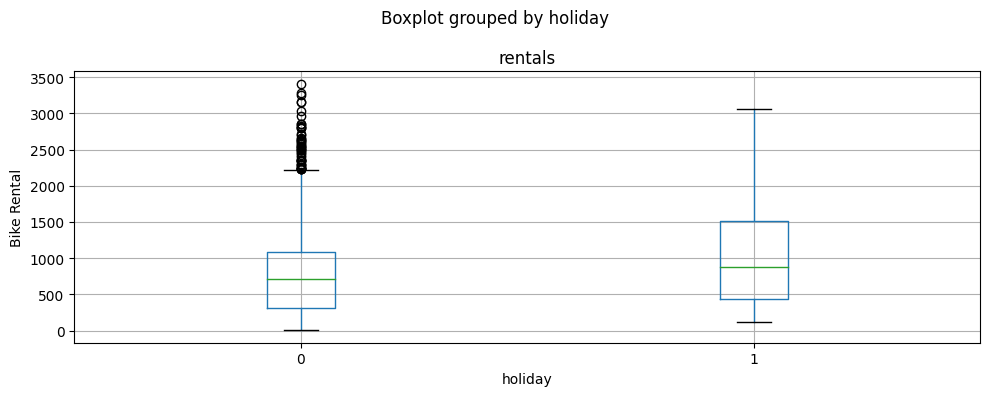

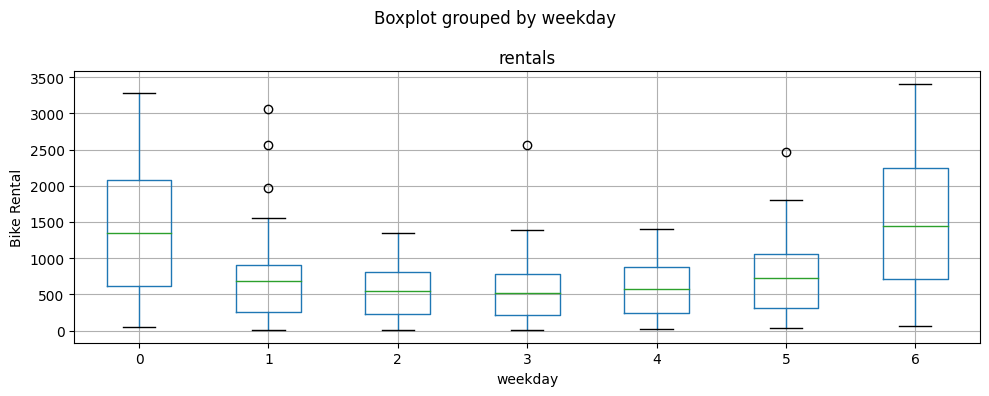

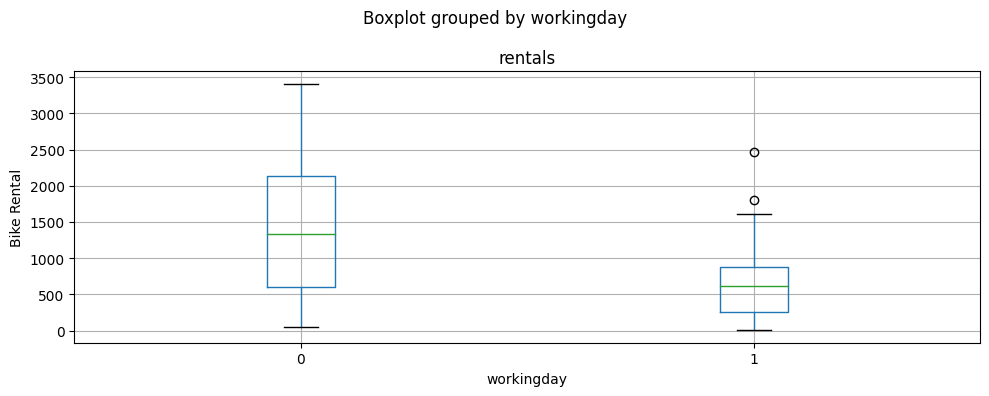

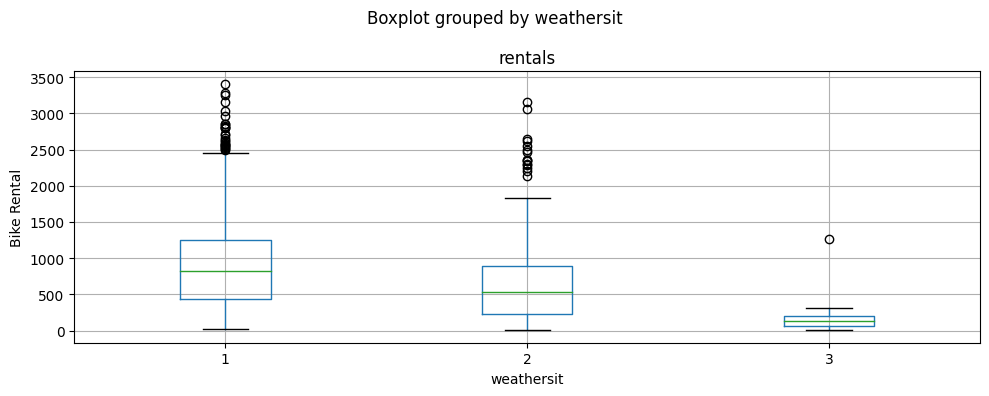

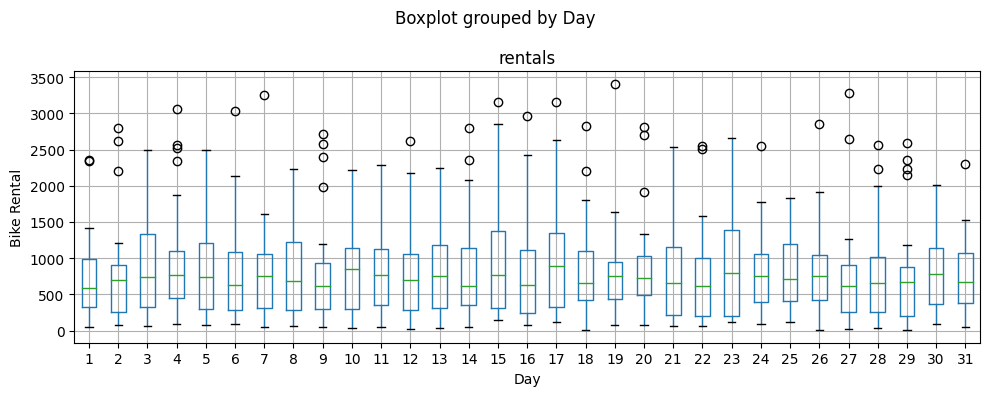

In [50]:
#Plot the box plot for categorical features
%matplotlib inline
for col in cat_features:
  fig = plt.figure(figsize= (10,4))
  ax= fig.gca()
  bike_data.boxplot(column= "rentals", by =col, ax=ax)
  # ax.set_xlabel(col)
  plt.ylabel("Bike Rental")
  # ax.set_title("Bike Rent vs " +col)
  plt.tight_layout() #Rental don't superimpose boxbplot grouped by heading
plt.show()

In [51]:
#Split the data into train and test dataset
X,y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print(f"Features :{X[:10]} \n Labels: {y[:10]}", sep = '\n')


Features :[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size = 0.30, random_state=42)
print(f"X_train shape : {X_train.shape} \n X_test shape : {X_test.shape} \n y_train shape : {y_train.shape} \n y_test shape : {y_test.shape} \n")

# print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

X_train shape : (511, 10) 
 X_test shape : (220, 10) 
 y_train shape : (511,) 
 y_test shape : (220,) 



In [53]:
#Train the model
from sklearn.linear_model import LinearRegression

model= LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [54]:
#Predict the model
prediction = model.predict(X_test)
np.set_printoptions(suppress = True)
print("Prediction :", np.round(prediction)[:10])
print("Actual: ",y_test[:10] )

Prediction : [ 570.  -88.  214. 1155.  849. 1051. -236.  210. 1198.  930.]
Actual:  [ 551   61  456 2347  845  975   53  163 1511  880]


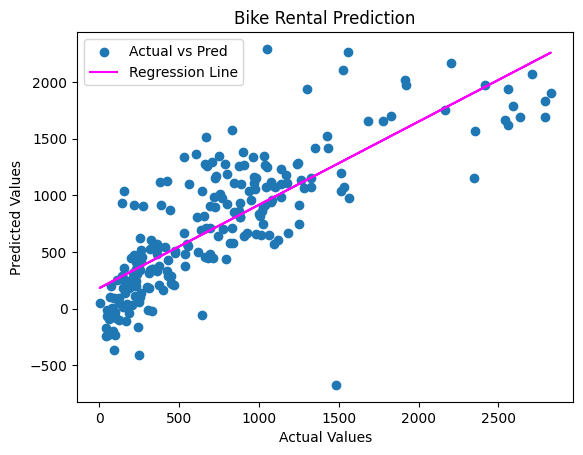

In [55]:
#Plot the prediction with actual value

plt.scatter(y_test, prediction, label = "Actual vs Pred")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Bike Rental Prediction")
#Plot the Regression Line
z= np.polyfit(y_test, prediction, 1)
p= np.poly1d(z)
plt.plot(y_test, p(y_test), color="magenta", label= "Regression Line")
plt.legend()
plt.show()

In [56]:
#Model Accuracy

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

r2 = r2_score(y_test, prediction)
print("R2- Squared :", r2)

Mean Squared Error : 156424.81465969092
Root Mean Squared Error:  395.50577070340063
R2- Squared : 0.612516566520613


Use another Regression **LASSO**

Lasso() 

Prediction : [ 582.  -38.  235. 1129.  824. 1091. -237.  224. 1172.  961.]
Actual : [ 551   61  456 2347  845  975   53  163 1511  880]


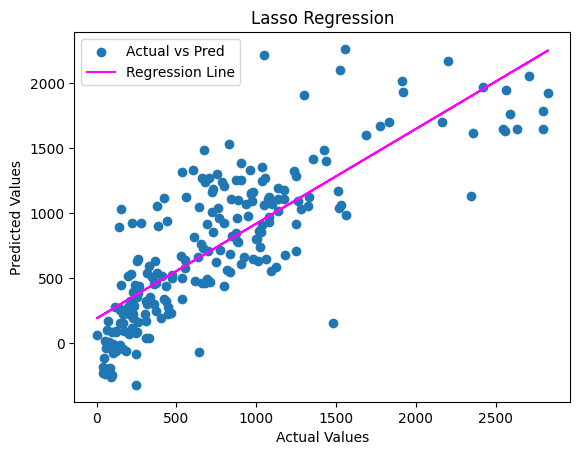

Mean Squared Error : 142322.54555100595
Root Mean Squared Error:  377.2566043835495
R2- Squared : 0.6474496151291191


In [57]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)
print(model, '\n')

#Evaluate the model
prediction = model.predict(X_test)
np.set_printoptions(suppress = True)
print("Prediction :", np.round(prediction)[:10])
print("Actual :", y_test[:10])

#Plot the Scatter Graph
plt.scatter(y_test, prediction, label="Actual vs Pred")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression")
#Plot the Regression Line
z= np.polyfit(y_test, prediction, 1)
p= np.poly1d(z)
plt.plot(y_test, p(y_test), color="magenta", label= 'Regression Line')
plt.legend()
plt.show()

#Model Accuracy

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

r2 = r2_score(y_test, prediction)
print("R2- Squared :", r2)

Use **Decion Tree Algorithm**

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

#Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print(model, '\n')

#Visualize the model
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_7 <= 0.42
|   |--- feature_7 <= 0.31
|   |   |--- feature_6 <= 0.27
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- feature_7 <= 0.18
|   |   |   |   |   |   |--- feature_9 <= 0.26
|   |   |   |   |   |   |   |--- feature_9 <= 0.25
|   |   |   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_9 <= 0.22
|   |   |   |   |   |   |   |   |   |   |--- value: [196.00]
|   |   |   |   |   |   |   |   |   |--- feature_9 >  0.22
|   |   |   |   |   |   |   |   |   |   |--- value: [150.00]
|   |   |   |   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_9 <= 0.21
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [117.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  3.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [93.00]
|   |   |   | 

Prediction : [ 449.  115.  178.  956. 1118. 1198.   54.  618. 1051.  723.]
Actual : [ 551   61  456 2347  845  975   53  163 1511  880]


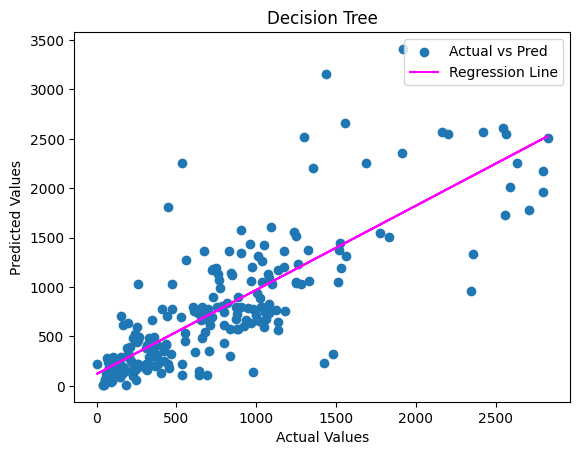

Mean Squared Error : 166845.05454545454
Root Mean Squared Error:  408.4667116736131
R2- Squared : 0.5867043554759737


In [59]:
#Evaluate the model
prediction = model.predict(X_test)
np.set_printoptions(suppress = True)
print("Prediction :", np.round(prediction)[:10])
print("Actual :", y_test[:10])

#Plot the Scatter Graph
plt.scatter(y_test, prediction, label="Actual vs Pred")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree")
#Plot the Regression Line
z= np.polyfit(y_test, prediction, 1)
p= np.poly1d(z)
plt.plot(y_test, p(y_test), color="magenta", label= 'Regression Line')
plt.legend()
plt.show()

#Model Accuracy
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

r2 = r2_score(y_test, prediction)
print("R2- Squared :", r2)

Use **Random Forest**

RandomForestRegressor() 

Prediction : [ 577.   80.  297. 1047.  827.  933.   71.  662. 1232.  885.]
Actual : [ 551   61  456 2347  845  975   53  163 1511  880]


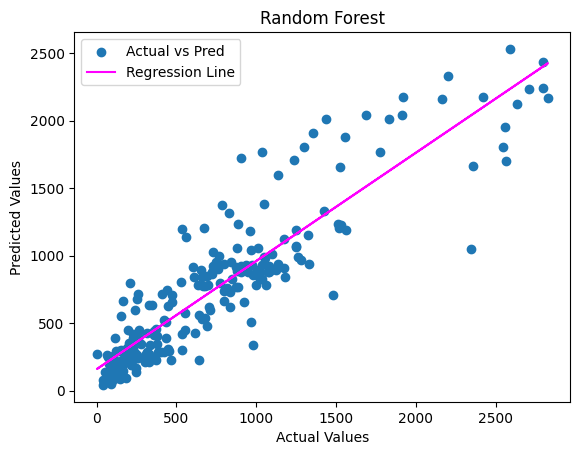

Mean Squared Error : 77522.21158500003
Root Mean Squared Error:  278.4281084678773
R2- Squared : 0.8079679826936567


In [60]:
from sklearn.ensemble import RandomForestRegressor

#Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print(model, '\n')

#Evaluate the model
prediction = model.predict(X_test)
np.set_printoptions(suppress = True)
print("Prediction :", np.round(prediction)[:10])
print("Actual :", y_test[:10])

#Plot the Scatter Graph
plt.scatter(y_test, prediction, label="Actual vs Pred")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest")
#Plot the Regression Line
z= np.polyfit(y_test, prediction, 1)
p= np.poly1d(z)
plt.plot(y_test, p(y_test), color="magenta", label= 'Regression Line')
plt.legend()
plt.show()

#Model Accuracy

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

r2 = r2_score(y_test, prediction)
print("R2- Squared :", r2)

Use **Boosting Ensemble Algorithm**

GradientBoostingRegressor() 

Prediction : [ 590.   20.  398.  898.  871.  903.   68.  342. 1850.  833.]
Actual : [ 551   61  456 2347  845  975   53  163 1511  880]


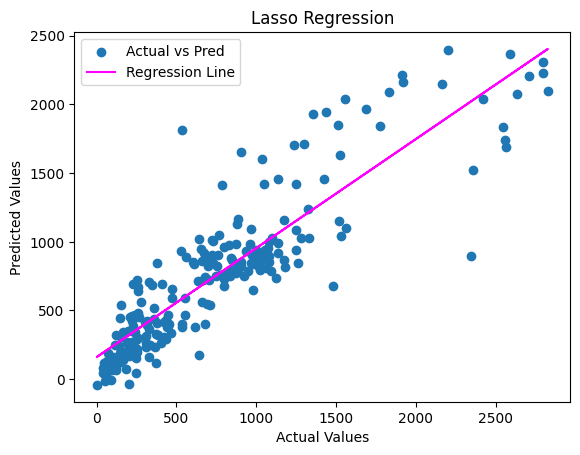

Mean Squared Error : 85696.09446292698
Root Mean Squared Error:  292.7389527598385
R2- Squared : 0.7877202732155411


In [61]:
from sklearn.ensemble import GradientBoostingRegressor

#Train the model
model = GradientBoostingRegressor().fit(X_train, y_train)
print(model, '\n')

#Evaluate the model
prediction = model.predict(X_test)
np.set_printoptions(suppress = True)
print("Prediction :", np.round(prediction)[:10])
print("Actual :", y_test[:10])

#Plot the Scatter Graph
plt.scatter(y_test, prediction, label="Actual vs Pred")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression")
#Plot the Regression Line
z= np.polyfit(y_test, prediction, 1)
p= np.poly1d(z)
plt.plot(y_test, p(y_test), color="magenta", label= 'Regression Line')
plt.legend()
plt.show()

#Model Accuracy

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

r2 = r2_score(y_test, prediction)
print("R2- Squared :", r2)

**Hyperparameter Tuning**

Find the best parameter for learning rate and n_estimators

Best Estimatior : {'learning_rate': 0.1, 'n_estimators': 90}
GradientBoostingRegressor(n_estimators=90) 

Prediction : [ 595.   32.  397.  895.  865.  904.   66.  344. 1840.  829.]
Actual : [ 551   61  456 2347  845  975   53  163 1511  880]


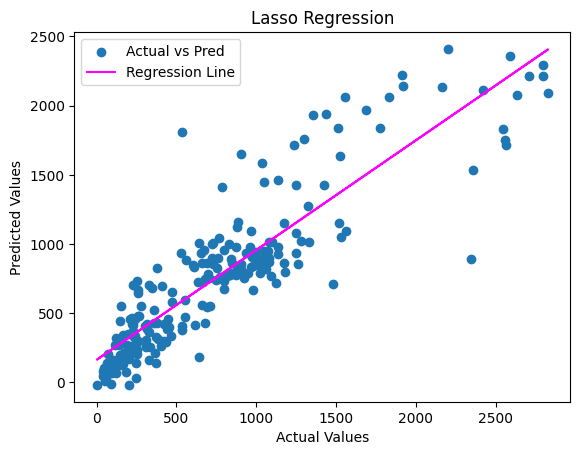

Mean Squared Error : 84975.65824564733
Root Mean Squared Error:  291.5058459888023
R2- Squared : 0.7895048820046371


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score

alg = GradientBoostingRegressor()

#Hyperparameter values
params = {
    'learning_rate' : [0.1,0.15,0.2,0.5, 1.0],
    'n_estimators': [50,80,90,100,150]
}

#Find best parameter to optimize R2 score
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring = score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best Estimatior :", gridsearch.best_params_)

#Train the model
model= gridsearch.best_estimator_
print(model, '\n')

#Evaluate the model
prediction = model.predict(X_test)
np.set_printoptions(suppress = True)
print("Prediction :", np.round(prediction)[:10])
print("Actual :", y_test[:10])

#Plot the Scatter Graph
plt.scatter(y_test, prediction, label="Actual vs Pred")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression")
#Plot the Regression Line
z= np.polyfit(y_test, prediction, 1)
p= np.poly1d(z)
plt.plot(y_test, p(y_test), color="magenta", label= 'Regression Line')
plt.legend()
plt.show()

#Model Accuracy

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

r2 = r2_score(y_test, prediction)
print("R2- Squared :", r2)

**Preprocessing** the data

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

#Preprocessing
# numeric_features = [6,7,8,9]
# cat_features = [0,1,2,3,4,5]
numeric_transformer = Pipeline(steps= [('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, cat_features)])

#Create Preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])

#Train the model
model = pipeline.fit(X_train,(y_train))
print(model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


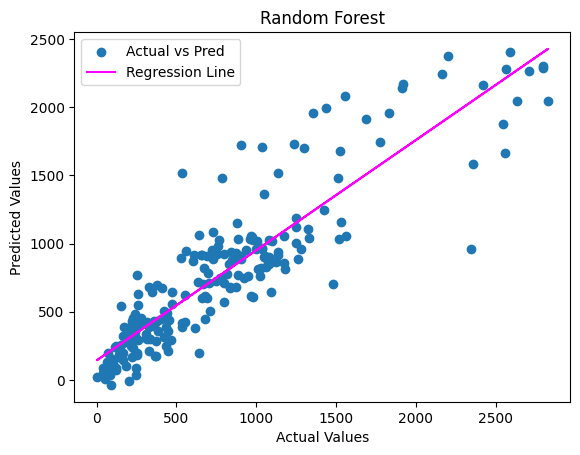

Mean Squared Error : 78108.60876871942
Root Mean Squared Error:  279.4791741234388
R2- Squared : 0.8065154050152074


In [74]:
#Evaluate the model
prediction = model.predict(X_test)
# np.set_printoptions(suppress = True)
# print("Prediction :", np.round(prediction)[:10])
# print("Actual :", y_test[:10])

#Plot the Scatter Graph
plt.scatter(y_test, prediction, label="Actual vs Pred")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest")
#Plot the Regression Line
z= np.polyfit(y_test, prediction, 1)
p= np.poly1d(z)
plt.plot(y_test, p(y_test), color="magenta", label= 'Regression Line')
plt.legend()
plt.show()

#Model Accuracy

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

r2 = r2_score(y_test, prediction)
print("R2- Squared :", r2)

Use different estimator in Pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 



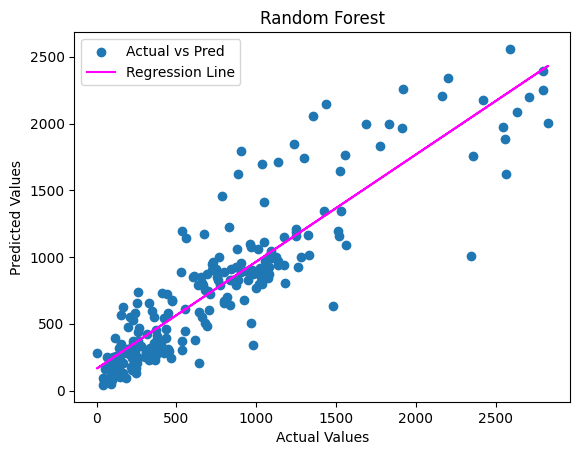

Mean Squared Error : 82349.9103768182
Root Mean Squared Error:  286.96674088963374
R2- Squared : 0.7960091812226261


In [75]:
#Create Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

#Fit the model
model = pipeline.fit(X_train, (y_train))
print(model, '\n')


#Evaluate the model
prediction = model.predict(X_test)

#Plot the Scatter Graph
plt.scatter(y_test, prediction, label="Actual vs Pred")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest")
#Plot the Regression Line
z= np.polyfit(y_test, prediction, 1)
p= np.poly1d(z)
plt.plot(y_test, p(y_test), color="magenta", label= 'Regression Line')
plt.legend()
plt.show()

#Model Accuracy

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

r2 = r2_score(y_test, prediction)
print("R2- Squared :", r2)

Save the Model using **Joblib library**

In [76]:
import joblib

#Save the model using pickle file
filename = './bike_share.pkl'
joblib.dump(model, filename)


['./bike_share.pkl']

In [79]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.426957,0.52927,0.536957,0.3869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.426957, 0.52927, 0.536957, 0.3869]
Prediction: 642 rentals
